In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Mendefinisikan data path

path_data = '/content/gdrive/MyDrive/MBKM Data Scientist/Dataset - Handling Outlier'

In [3]:
# Membaca directory
import os
os.listdir(path_data)

['winequalityN.csv',
 'TestMatches_Dataset.csv',
 'salesmonthly.csv',
 'free_advertising_data.csv']

In [4]:
# Import Packages
import pandas as pd
import numpy as np
import statistics
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt

### Case 1 dengan free_advertising_data.csv

Apakah terdeteksi multivariat outlier pada Radio dan Newspaper?

In [65]:
df1 = pd.read_csv('/content/gdrive/MyDrive/MBKM Data Scientist/Dataset - Handling Outlier/free_advertising_data.csv')
df1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         197 non-null    float64
 1   Radio      197 non-null    float64
 2   Newspaper  197 non-null    float64
 3   Sales      197 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [67]:
df = df1[['Radio', 'Newspaper']]
df = df.to_numpy()

In [68]:
# Covariance matrix
covariance  = np.cov(df , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df , axis=0)

In [69]:
# Jarak antara center point and masing-masing point observasi
distances = []
for i, val in enumerate(df):
    p1 = val
    p2 = centerpoint
    distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

# Nilai cutoff (threshold) dari Chi-Sqaure Distribution untuk deteksi outlier 
cutoff = chi2.ppf(0.95, df.shape[1])

# Index outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index Outliers ----')
print(outlierIndexes)

print('--- Observasi terdeteksi sebagai outlier -----')
print(df[ distances > cutoff , :])

--- Index Outliers ----
(array([ 74, 126, 136, 162]),)
--- Observasi terdeteksi sebagai outlier -----
[[43.7 89.4]
 [49.   3.2]
 [43.9  1.7]
 [ 3.4 84.8]]


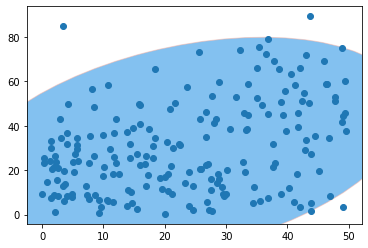

In [70]:
## ellipse dimensions 
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df[: , 0], df[ : , 1])
plt.show()

Ada berapa banyak outlier pada Radio dan Newspaper? 

In [71]:
len(df[ distances > cutoff])

4

### Case 2 gunakan data TestMatches_Dataset.csv

In [19]:
df2=pd.read_csv('/content/gdrive/MyDrive/MBKM Data Scientist/Dataset - Handling Outlier/TestMatches_Dataset.csv')

In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8291 entries, 0 to 8290
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MatchKey       8291 non-null   int64  
 1   BattingTeam    8291 non-null   object 
 2   Score          8291 non-null   int64  
 3   Wickets        8291 non-null   int64  
 4   InningsResult  8291 non-null   object 
 5   Overs          8291 non-null   float64
 6   RPO            8291 non-null   object 
 7   Lead           8291 non-null   int64  
 8   Inns           8291 non-null   int64  
 9   Result         8291 non-null   object 
 10  Opposition     8291 non-null   object 
 11  HostCountry    8291 non-null   object 
 12  StartDate      8291 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(2), int64(5), object(7)
memory usage: 907.0+ KB


Apakah terdeteksi outlier pada kolom Score dan Overs?

In [73]:
df3 = df2[['Score', 'Overs']]
df3 = df3.to_numpy()

In [41]:
# Covariance matrix
covariance1  = np.cov(df3 , rowvar=False)

# Covariance matrix power of -1
covariance_pm12 = np.linalg.matrix_power(covariance1, -1)

# Center point
centerpoint1 = np.mean(df3 , axis=0)

In [ ]:
# Jarak antara center point and masing-masing point observasi
distances = []
for i, val1 in enumerate(df3):
    p1 = val1
    p2 = centerpoint1
    distance = (p1-p2).T.dot(covariance_pm12).dot(p1-p2)
    distances.append(distance)
distances1 = np.array(distances)

# Nilai cutoff (threshold) dari Chi-Sqaure Distribution untuk deteksi outlier 
cutoff1 = chi2.ppf(0.95, df.shape[1])

# Index outliers
outlierIndexes1 = np.where(distances1 > cutoff1 )

print('--- Index Outliers ----')
print(outlierIndexes1)

print('--- Observasi terdeteksi sebagai outlier -----')
print(df3[ distances1 > cutoff1 , :])

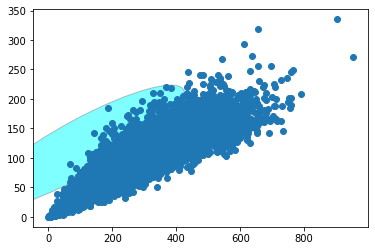

In [61]:
## ellipse dimensions 
pearson = covariance1[0, 1]/np.sqrt(covariance1[0, 0] * covariance1[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance1)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint1[0], centerpoint1[1]),
                  width=lambda_[0]*np.sqrt(cutoff1)*2, height=lambda_[1]*np.sqrt(cutoff1)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#808080')
ellipse.set_facecolor('#00FFFF')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df3[: , 0], df3[ : , 1])
plt.show()

Ada berapa banyak data yang terdeteksi sebagai outlier?

In [44]:
len(df3[ distances1 > cutoff1])

517

Apakah ada outlier pada variabel Overs dan Leads?

In [46]:
df4 = df2[['Overs', 'Lead']]
df4 = df4.to_numpy()

In [49]:
covariance2  = np.cov(df4 , rowvar=False)

# Covariance matrix power of -1
covariance_pm13 = np.linalg.matrix_power(covariance2, -1)

# Center point
centerpoint2 = np.mean(df4 , axis=0)

In [57]:
# Jarak antara center point and masing-masing point observasi
distances = []
for i, val2 in enumerate(df3):
    p1 = val2
    p2 = centerpoint2
    distance = (p1-p2).T.dot(covariance_pm13).dot(p1-p2)
    distances.append(distance)
distances2 = np.array(distances)

# Nilai cutoff (threshold) dari Chi-Sqaure Distribution untuk deteksi outlier 
cutoff2 = chi2.ppf(0.95, df.shape[1])

# Index outliers
outlierIndexes2 = np.where(distances2 > cutoff2 )

print('--- Index Outliers ----')
print(outlierIndexes2)

print('--- Observasi terdeteksi sebagai outlier -----')
print(df4[ distances2 > cutoff2 , :])

--- Index Outliers ----
(array([   0,    5,    7, ..., 8288, 8289, 8290]),)
--- Observasi terdeteksi sebagai outlier -----
[[186.  464. ]
 [156.2 404. ]
 [170.  388. ]
 ...
 [111.4 -33. ]
 [ 75.5 327. ]
 [ 97.    1. ]]


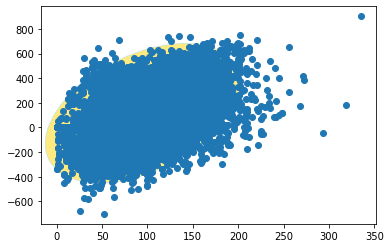

In [60]:
## ellipse dimensions 
pearson = covariance2[0, 1]/np.sqrt(covariance2[0, 0] * covariance2[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance2)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint2[0], centerpoint2[1]),
                  width=lambda_[0]*np.sqrt(cutoff2)*2, height=lambda_[1]*np.sqrt(cutoff2)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#ADD8E6')
ellipse.set_facecolor('#FFD700')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df4[: , 0], df4[ : , 1])
plt.show()

Berapa banyak outlier yang terdeteksi pada Overs dan Lead?

In [59]:
len(df4[ distances2 > cutoff2 ])

5996

Apakah ada outlier pada kolom Score?

In [93]:
df5 = df2[['Score']]
df5 = df5.to_numpy()

In [94]:
# Mendeteksi outlier dengan z-score
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers  # Driver code
outliers_zscore = detect_outliers_zscore(df5)
print("Outliers from Z-scores method: ",outliers_zscore)

273.7675793028585 135.10890603809696
Outliers from Z-scores method:  [array([729]), array([695]), array([701]), array([903]), array([681]), array([758]), array([790]), array([687]), array([708]), array([699]), array([692]), array([952]), array([682]), array([735]), array([705]), array([751]), array([713]), array([747]), array([756]), array([765]), array([749]), array([760]), array([726]), array([707]), array([710]), array([730]), array([680]), array([690]), array([759]), array([687]), array([713]), array([715])]


Jika terdeteksi outlier, atasi outlier tersebut ya! Tunjukkan berapa banyak data yang dianggap sebagai outlier!

In [86]:
len(outliers_zscore)

32

In [111]:
e = []
for y in df5:
    ff = y in outliers_zscore
    if ff is True:
        y=statistics.median(df5)
    else:
        y=y
    e.append(int(y))
print(e)

In [112]:
print("Mean data sebelum penggantian nilai: ",np.mean(df5))
print("Median data sebelum penggantian nilai: ",np.median(df5))
print("Mean data setelah penggantiannilai: ",np.mean(e))
print("Median data setelah penghapusan nilai: ",np.median(e))

Mean data sebelum penggantian nilai:  273.7675793028585
Median data sebelum penggantian nilai:  255.0
Mean data setelah penghapusan:  271.98595471606734
Median data setelah penghapusan:  255.0


Text(0.5, 0, 'Score')

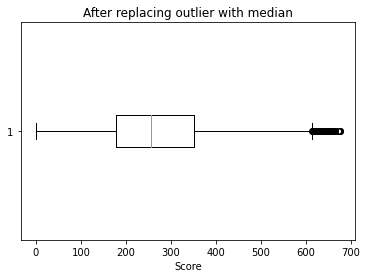

In [115]:
plt.boxplot(e, vert=False)
plt.title("After replacing outlier with median")
plt.xlabel('Score')

Bagaimana dengan kolom Lead, apakah terdeteksi outlier? berapa banyak outlier yang terdeteksi?

In [98]:
df6=df2['Lead']
df6 = df6.to_numpy()

In [99]:
# Fungsi Pendeteksian Outlier dengan IQR
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
outliers_iqr = detect_outliers_iqr(df6)
print("Outliers from IQR method: ", outliers_iqr)

Outliers from IQR method:  [-702, -675, 903]


Bagaimana setelah outlier diatasi?

In [101]:
tenth_percentile = np.percentile(df6, 10)
ninetieth_percentile = np.percentile(df6, 90)
print(tenth_percentile, ninetieth_percentile)
p = []
for r in df6:
    if r<tenth_percentile:
        r=tenth_percentile
    elif r>ninetieth_percentile:
        r=ninetieth_percentile
    else:
        r=r
    p.append(r)
print("New sample:",p)

-184.0 420.0
New sample: [420.0, -184.0, -124, 112, -51, 404, -184.0, 388, -67, 314, 1, 317, -18, 117, 4, 144, 45, 210, -32, 376, -184.0, -184.0, 194, -49, 338, -143, 299, -37, 123, -3, 324, -141, 262, 1, 420.0, -158, 214, -113, 175, 65, 244, -159, 252, -167, 58, 1, 285, 292, 193, 1, 315, -184.0, 296, -184.0, 388, -143, 420.0, -184.0, 249, -118, 328, -157, 247, -184.0, 319, -184.0, 196, 25, 401, -184.0, 282, -101, 252, 301, -106, 401, -177, 420.0, -184.0, -80, 420.0, -67, 328, -184.0, 184, -93, 283, 4, 148, 129, 31, 2, 385, -90, 420.0, -184.0, 218, -20, 158, 2, 187, 146, -16, 420.0, -184.0, -103, 76, 34, 128, -53, 295, -117, 255, -96, 273, 27, 273, 2, 266, 116, 281, 1, 285, 78, 420.0, -184.0, 214, -109, 420.0, -184.0, 137, 144, 278, -49, 74, 47, 104, 1, 269, 81, 40, 1, 188, -6, 213, -126, 147, -28, 307, -184.0, 325, 27, 312, -184.0, 208, 102, 243, -19, 199, 0, 347, -95, 305, 17, 220, 1, 203, 4, 174, 1, 417, -184.0, 13, 3, 420.0, -184.0, -114, 348, 158, 169, -89, 420.0, -17, 377, -38, 3

In [103]:
print("Mean data awal : ",np.mean(df6))
print("Median data awal : ",np.median(df6))
print("Mean data setelah replacing batas tertentu : ",np.mean(p))
print("Median data setelah replacing batas tertentu: ",np.median(p))

Mean data :  116.43167289832348
Median data :  116.0
Mean data setelah replacing batas tertentu :  116.26076468459776
Median data setelah replacing batas tertentu:  116.0


Text(0.5, 0, 'Lead')

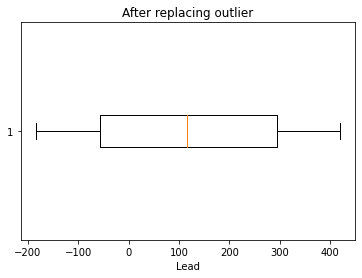

In [116]:
plt.boxplot(p, vert=False)
plt.title("After replacing outlier")
plt.xlabel('Lead')